In [1]:
### 네이버영화 리뷰 분류 데이터로 네이버 웹툰 블로그 글을 분류할 수 있을까?
# 영화리뷰 분류 데이터로 매긴 점수를 웹툰 별점과 비교해서 산포도(scatter diagram)를 그리고
# 카이제곱 검정과, 피어슨 상관분석, 스피어만 상관분석을 해본다.
# 결론은 상관계수가 너무 낮고, 카이제곱 검정에서는 p값이 높아 귀무가설을 기각하지 못했다.

import pandas as pd
df1 = pd.read_json('data/dataPN.json', encoding = 'utf-8')

In [2]:
df2 = pd.read_json('data/naverWebtoonData.json', encoding = 'utf-8')

In [3]:
df1[:2]

,title,nSearch,positive review,negative review
0,가비지타임,100,5513,2546
1,겟백,100,4825,3093


In [6]:
nSearchMax = df1[df1['nSearch'] == 100]
t
print(len(df1),len(nSearchMax))

527 380


In [7]:
mergeDf = pd.merge(nSearchMax, df2, how = 'inner', on = None)
mergeDf[:2]

,title,nSearch,positive review,negative review,artist,genre,description,titleID,score,blog_description
0,가비지타임,100,5513,2546,[2사장],"[스토리, 스포츠]",열혈따윈 개나 줘. 낙오자들 뿐인 농구부의 운명은?,703844,9.96,[네이버 웹툰 <가비지타임> 프로필 사진. 주인공 기상호. 몇 년 전까지만 해도 잘...
1,겟백,100,4825,3093,[세윤],"[에피소드, 드라마]","7년 전, 운명이 뒤바뀐 소녀들. 태어날 때 부터 타고난 능력을 지닌 다정과...",727798,9.98,[느와르 장르의 네이버 웹툰 '겟백 (Get Back)'을 소개합니다. 겟 백 ( ...


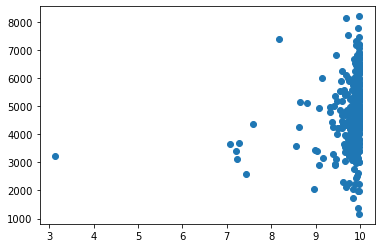

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(mergeDf['score'], mergeDf['positive review'])
plt.show()

In [9]:
mergeDf = mergeDf[mergeDf['score'] >= 7]

In [11]:
len(mergeDf)

379

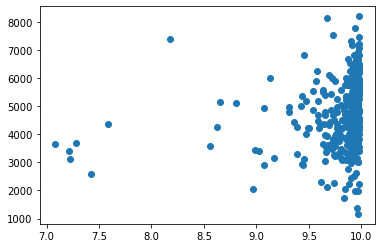

In [12]:
plt.scatter(mergeDf['score'], mergeDf['positive review'])
plt.show()

In [13]:
mergeDf = mergeDf[mergeDf['score'] >= 9]
len(mergeDf)

366

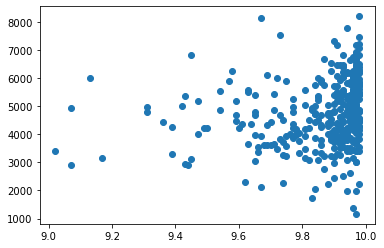

In [14]:
plt.scatter(mergeDf['score'], mergeDf['positive review'])
plt.show()

In [16]:
mergeDftop = mergeDf[mergeDf['score'] >= 9.6]
len(mergeDftop)

339

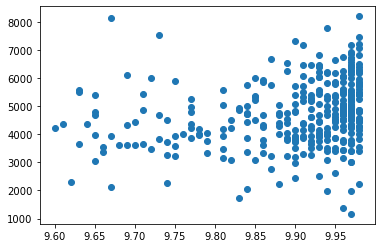

In [18]:
plt.scatter(mergeDftop['score'], mergeDftop['positive review'])
plt.show()

In [19]:
bottom = mergeDftop[mergeDftop['positive review'] < 2000]
bottom.head()

,title,nSearch,positive review,negative review,artist,genre,description,titleID,score,blog_description
63,[드라마원작] 간 떨어지는 동거,100,1164,7225,[나],"[스토리, 로맨스]",인간이 되고자 900년간 노력해왔지만 불의의 사고로 한 여대생에게 여우구슬을 빼앗...,699415,9.97,[드라마를 보면 볼수록 간 떨어지는 동거 원작 웹툰의 장면 연출 포인트를 잘 잡았다...
137,좀비 파이트,100,1988,5548,[이저녁],"[스토리, 액션]",이안은 삶이 힘들어질수록 감정을 끄며 버텨낸다. 아버지의 폭력과 빚더미 뿐인 ...,765157,9.94,"[21.3.19~ 토요웹툰 시지프스?ㅜㅜ 무력감에 빠질 때쯤, 공감 가면서도 부러운..."
264,방과후 선녀,100,1381,6157,[이윤후],"[스토리, 드라마]","""인간의 믿음이 없으면, 우리는 존재할 수 없어."" 신기를 타고났지만 신내...",761587,9.96,[웹툰 모음 신이 담긴 아이 / 내 친구는 선녀 보살 / 미래의 골동품 가게 / 바...
349,기사님을 지켜줘,100,1739,5760,[달봉],"[스토리, 판타지]",첫눈에 반한 남학생을 떠올리며 언니의 피규어 '브릭'에게 뽀뽀 연습을 하는 '예은'...,770590,9.83,"[왜 우는 건지 모르겠지만, 차차 내용이 나올 거 같아서 일단 저장~☆ 이 장면은 ..."
370,"곱게 키웠더니, 짐승",100,1974,6086,"[이른꽃, 티바, 여슬기]","[에피소드, 드라마]","반쪽짜리 황녀 블론디나. 외로운 그녀의 유일한 친구는 귀여운 고양이...가 아니라,...",761104,9.97,[이미지출처 : 네이버 웹툰 곱게키웠더니 짐승에서 캡쳐 환타지로맨스웹툰 곱게키웠더니...


In [20]:
# scoring 방법을 바꿔서 다시 시도해보았다.
import pandas as pd
df1 = pd.read_json('data/dataReviewScore.json', encoding = 'utf-8')
df2 = pd.read_json('data/naverWebtoonData.json', encoding = 'utf-8')

In [22]:
nSearchMax = df1[df1['nSearch'] == 100]
print(len(df1),len(nSearchMax))

527 380


In [23]:
mergeDf = pd.merge(nSearchMax, df2, how = 'inner', on = None)
mergeDf[:2]

,title,nSearch,review_score,artist,genre,description,titleID,score,blog_description
0,가비지타임,100,6367,[2사장],"[스토리, 스포츠]",열혈따윈 개나 줘. 낙오자들 뿐인 농구부의 운명은?,703844,9.96,[네이버 웹툰 <가비지타임> 프로필 사진. 주인공 기상호. 몇 년 전까지만 해도 잘...
1,겟백,100,6032,[세윤],"[에피소드, 드라마]","7년 전, 운명이 뒤바뀐 소녀들. 태어날 때 부터 타고난 능력을 지닌 다정과...",727798,9.98,[느와르 장르의 네이버 웹툰 '겟백 (Get Back)'을 소개합니다. 겟 백 ( ...


In [25]:
mergeDf = mergeDf[mergeDf['score'] >= 9]
len(mergeDf)

366

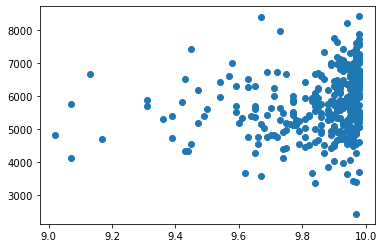

In [26]:
plt.scatter(mergeDf['score'], mergeDf['review_score'])
plt.show()

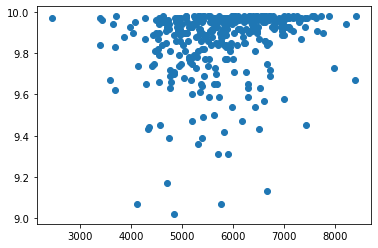

In [29]:
plt.scatter(mergeDf['review_score'], mergeDf['score'])
plt.show()

In [33]:
from scipy import stats
print(stats.pearsonr(mergeDf['review_score'], mergeDf['score']))
print(stats.spearmanr(mergeDf['review_score'], mergeDf['score']))
#둘다 상관계수가 너무 낮다.

(0.18433532414543632, 0.00039275653374574565)
SpearmanrResult(correlation=0.2845717030188156, pvalue=3.015733949118617e-08)


In [31]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(mergeDf['review_score'], mergeDf['score'])
chi2_contingency(crosstab)

(18600.458329984802,
 0.9138576892224614,
 18865,
 array([[0.00273224, 0.00546448, 0.00273224, ..., 0.1010929 , 0.13934426,
         0.10655738],
        [0.00273224, 0.00546448, 0.00273224, ..., 0.1010929 , 0.13934426,
         0.10655738],
        [0.00273224, 0.00546448, 0.00273224, ..., 0.1010929 , 0.13934426,
         0.10655738],
        ...,
        [0.00273224, 0.00546448, 0.00273224, ..., 0.1010929 , 0.13934426,
         0.10655738],
        [0.00273224, 0.00546448, 0.00273224, ..., 0.1010929 , 0.13934426,
         0.10655738],
        [0.00273224, 0.00546448, 0.00273224, ..., 0.1010929 , 0.13934426,
         0.10655738]]))

In [32]:
result = chi2_contingency(crosstab)
print('Chi2 Statistic:{}, p-value:{}'.format(result[0], result[1]))
# p value가 너무 높아 상관관계가 없음이 나타났다.

Chi2 Statistic:18600.458329984802, p-value:0.9138576892224614
